In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import os

In [2]:
! git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20304, done.
remote: Counting objects: 100% (1347/1347), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 20304 (delta 1301), reused 1223 (delta 1220), pack-reused 18957
Receiving objects: 100% (20304/20304), 11.18 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (14304/14304), done.


In [3]:
%cd yolov10

/kaggle/working/yolov10


In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 13.2 MB/s eta 0:00:00a 0:00:01


# Define the new content for data.yaml

In [5]:
new_data_yaml_content = """
train: /kaggle/input/drowsiness-detection-for-yolov8/train/images
val: /kaggle/input/drowsiness-detection-for-yolov8/valid/images
test: /kaggle/input/drowsiness-detection-for-yolov8/test/images

nc: 3
names: ["Drowsiness", "awake", "yawn"]
"""

# Create a new directory for the modified data.yaml file
new_data_yaml_dir = '/kaggle/working/drowsiness-detection'
os.makedirs(new_data_yaml_dir, exist_ok=True)

# Path to the new data.yaml file
new_data_yaml_path = os.path.join(new_data_yaml_dir, 'data.yaml')

# Save the new content to the new data.yaml file
with open(new_data_yaml_path, 'w') as file:
    file.write(new_data_yaml_content)


# Downloading pretrained weights

In [6]:
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt"
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded /kaggle/working/yolov10/weights/yolov10s.pt
Downloaded /kaggle/working/yolov10/weights/yolov10m.pt
Downloaded /kaggle/working/yolov10/weights/yolov10x.pt
Downloaded /kaggle/working/yolov10/weights/yolov10l.pt


our model

In [7]:
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolov10/weights/yolov10m.pt')

test

In [8]:
model.predict(conf= .25 ,save= True, source= '/kaggle/input/image-for-predict/422946657_1843239819427840_4190706023266226446_n.jpg')


image 1/1 /kaggle/input/image-for-predict/422946657_1843239819427840_4190706023266226446_n.jpg: 640x512 1 0, 89.8ms
Speed: 10.5ms preprocess, 89.8ms inference, 254.6ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /kaggle/working/yolov10/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61', 62: '62', 63: '63', 64: '64', 65: '65', 66: '66', 67: '67', 68: '68', 69: '69', 70: '70', 71: '71', 72: '72', 73: '73', 74: '74', 75: '75', 76: '76', 77: '77', 78: '78', 79: '79'}
 obb: None
 orig_img: array([[[148, 164, 170],
         [146, 162, 168]

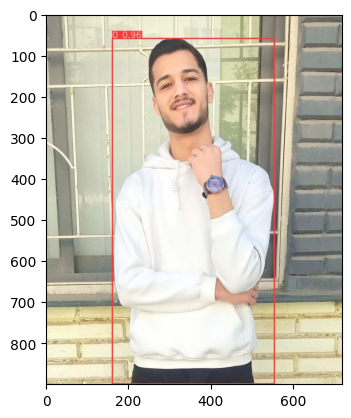

In [9]:
plt.imshow(np.array(Image.open('/kaggle/working/yolov10/runs/detect/predict/422946657_1843239819427840_4190706023266226446_n.jpg')))
plt.show()

0 here main person in coco dataset

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move model to cuda
model.to(device)
print(device)

cuda


# train model

In [11]:
model.train(data= '/kaggle/working/drowsiness-detection/data.yaml' , epochs= 15, batch= 8 ,workers= 2, augment= False)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov10/weights/yolov10m.pt, data=/kaggle/working/drowsiness-detection/data.yaml, epochs=15, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=cuda:0, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 4.02MB/s]
2024-07-01 17:39:58,991	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-01 17:39:59,892	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-01 17:40:02.345700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 17:40:02.345836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 17:40:02.476960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 22.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/drowsiness-detection-for-yolov8/train/labels... 12513 images, 27 backgrounds, 0 corrupt: 100%|██████████| 12513/12513 [00:37<00:00, 336.71it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/drowsiness-detection-for-yolov8/valid/labels... 1191 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:03<00:00, 372.33it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/yolov10/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolov10/runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/15      5.51G       1.05      1.247        1.5       1.05      2.671      1.518          1        640: 100%|██████████| 1565/1565 [08:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:22<00:00,  3.34it/s]


                   all       1191       1190      0.861       0.91      0.944      0.768

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/15      5.75G     0.8184     0.6429       1.27     0.8676     0.7304      1.299          2        640: 100%|██████████| 1565/1565 [07:46<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.50it/s]


                   all       1191       1190      0.926      0.928      0.966      0.785

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/15      5.74G     0.7786     0.5921      1.242     0.8274     0.6316      1.271          4        640: 100%|██████████| 1565/1565 [07:40<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.50it/s]


                   all       1191       1190        0.9      0.876      0.954      0.788

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/15      5.74G     0.7365      0.556       1.21     0.7857     0.5817       1.24          2        640: 100%|██████████| 1565/1565 [07:38<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.51it/s]


                   all       1191       1190      0.923      0.904      0.963      0.795

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/15      5.73G     0.7145      0.529      1.196      0.762     0.5485      1.223          3        640: 100%|██████████| 1565/1565 [07:38<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.51it/s]


                   all       1191       1190       0.91      0.927      0.958      0.801
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/15      5.72G     0.6427     0.4163      1.167     0.6621     0.3892      1.191          1        640: 100%|██████████| 1565/1565 [07:38<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.50it/s]


                   all       1191       1190       0.91      0.914      0.965        0.8

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/15       5.7G     0.6048     0.3855      1.117     0.6218     0.3582      1.136          1        640: 100%|██████████| 1565/1565 [07:37<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.50it/s]


                   all       1191       1190      0.938      0.919      0.973      0.814

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/15      5.74G     0.5853     0.3591      1.098     0.5993     0.3247      1.113          1        640: 100%|██████████| 1565/1565 [07:37<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.50it/s]


                   all       1191       1190      0.934      0.925      0.971      0.822

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/15      5.74G     0.5725     0.3434      1.094     0.5844     0.3126      1.106          1        640: 100%|██████████| 1565/1565 [07:37<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.49it/s]


                   all       1191       1190      0.933       0.92      0.973      0.826

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/15      5.73G     0.5554     0.3242      1.083     0.5657      0.292      1.093          1        640: 100%|██████████| 1565/1565 [07:37<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.51it/s]


                   all       1191       1190      0.925      0.947      0.978      0.832

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/15      5.74G     0.5444     0.3128      1.074     0.5557     0.2801      1.085          1        640: 100%|██████████| 1565/1565 [07:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.52it/s]


                   all       1191       1190      0.947      0.944      0.978      0.831

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/15      5.74G     0.5352     0.3006      1.049     0.5436     0.2661      1.057          1        640: 100%|██████████| 1565/1565 [07:37<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.52it/s]


                   all       1191       1190      0.933      0.942      0.976      0.843

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/15      5.73G     0.5176      0.286      1.035      0.525     0.2532      1.041          1        640: 100%|██████████| 1565/1565 [07:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.51it/s]


                   all       1191       1190      0.938      0.949      0.981      0.848

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/15      5.73G     0.5079      0.273      1.023     0.5148     0.2418      1.029          1        640: 100%|██████████| 1565/1565 [07:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.51it/s]


                   all       1191       1190      0.943       0.95       0.98      0.847

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/15       5.7G     0.4958     0.2652       1.02     0.5023     0.2342      1.026          1        640: 100%|██████████| 1565/1565 [07:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.50it/s]


                   all       1191       1190      0.945      0.943      0.981      0.855

15 epochs completed in 2.032 hours.
Optimizer stripped from /kaggle/working/yolov10/runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from /kaggle/working/yolov10/runs/detect/train/weights/best.pt, 33.5MB

Validating /kaggle/working/yolov10/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16453858 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:20<00:00,  3.62it/s]


                   all       1191       1190      0.956      0.934      0.981      0.855
            Drowsiness       1191        280      0.955      0.908      0.974      0.887
                 awake       1191        538      0.946      0.946      0.982      0.885
                  yawn       1191        372      0.966      0.949      0.988      0.792
Speed: 0.1ms preprocess, 13.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /kaggle/working/yolov10/runs/detect/train


lr/pg0,▃▆█▇▇▇▆▅▅▄▄▃▂▂▁
lr/pg1,▃▆█▇▇▇▆▅▅▄▄▃▂▂▁
lr/pg2,▃▆█▇▇▇▆▅▅▄▄▃▂▂▁
metrics/mAP50(B),▁▅▃▅▄▅▆▆▆▇▇▇███
metrics/mAP50-95(B),▁▂▃▃▄▄▅▅▆▆▆▇▇▇█
metrics/precision(B),▁▆▄▆▅▅▇▆▆▆▇▆▇▇█
metrics/recall(B),▄▆▁▄▆▅▅▆▅█▇▇██▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_om,█▅▅▄▄▃▂▂▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78b2203e1780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04